In [20]:
import cv2
import numpy as np
from torchvision.io import read_video
import torch
from tqdm import tqdm

with open("/home/abigata/PhD/datasets/filelist_crema_train.txt", "r") as f:
    filelist = f.readlines()
    filelist = [x.strip() for x in filelist]

all_magnitudes = []
for file in tqdm(filelist):

    # read video
    video, audio, info = read_video(file, output_format="TCHW")
    interval = int(info["video_fps"] / 2)  # For 25 fps, this will be 12 or 13
    video = torch.nn.functional.interpolate(video, size=(64,64))

    prev_video = video[:-1]
    video = video[1:]
    magnitude = []
    for frame_count, (img_prev, img) in enumerate(zip(prev_video, video)):  # iterate over batch

        if frame_count % interval == 0:
            # convert to grayscale
            img_prev = cv2.cvtColor(img_prev.numpy().transpose(1, 2, 0), cv2.COLOR_RGB2GRAY)
            img = cv2.cvtColor(img.numpy().transpose(1, 2, 0), cv2.COLOR_RGB2GRAY)
            # estimate optical flow
            flow = cv2.calcOpticalFlowFarneback(img_prev, img, None, 0.5, 3, 15, 3, 5, 1.2, 0)
            magn, _ = cv2.cartToPolar(flow[..., 0], flow[..., 1])
            magnitude.append(magn)
    magnitude = np.mean(magnitude)
    all_magnitudes.append(magnitude)

  0%|          | 0/6290 [00:00<?, ?it/s]/home/abigata/miniconda3/envs/svd/lib/python3.9/site-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")
100%|██████████| 6290/6290 [03:58<00:00, 26.35it/s]


(array([  1.,   8.,  39., 165., 317., 440., 548., 508., 473., 436., 475.,
        355., 368., 276., 256., 195., 195., 168., 117., 129., 103.,  82.,
         79.,  72.,  46.,  51.,  46.,  42.,  31.,  27.,  36.,  20.,  19.,
         14.,  21.,  13.,   9.,  14.,  11.,  13.,  10.,   6.,   3.,   3.,
          4.,   4.,   5.,   4.,   1.,   5.,   1.,   2.,   2.,   2.,   1.,
          1.,   4.,   3.,   1.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          2.,   2.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([0.00735522, 0.01558661, 0.023818  , 0.03204938, 0.04028077,
        0.04851216, 0.05674355, 0.06497493, 0.07320633, 0.08143771,
        0.0896691 , 0.09790049, 0.10613188, 0.11436327, 0.12259465,
        0.13082604, 0.13905743, 0.14728881, 0.1555202 , 0.1637516 ,
        0.17198299, 0.18021438, 0.18844576, 0.

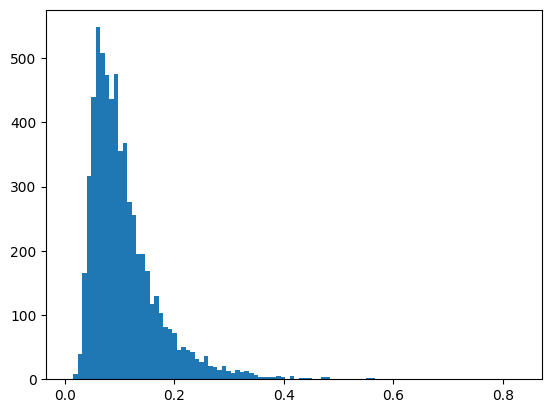

In [21]:
from matplotlib import pyplot as plt

plt.hist(all_magnitudes, bins=100)

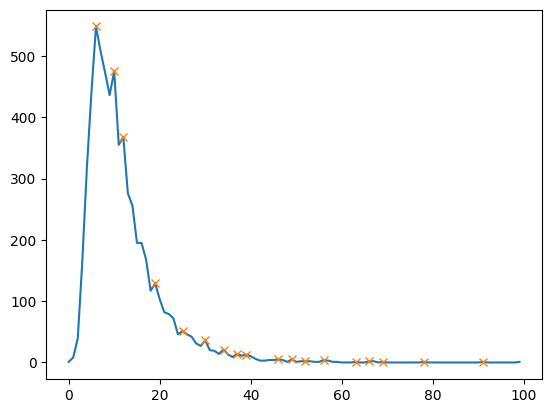

In [31]:
from scipy.signal import find_peaks

magnitude_hist, bin_edges = np.histogram(all_magnitudes, bins=100)

peaks, _ = find_peaks(magnitude_hist, height=0.1)
plt.plot(magnitude_hist)
plt.plot(peaks, magnitude_hist[peaks], "x")
plt.show()

In [28]:
bin_edges[peaks]

array([0.05674355, 0.0896691 , 0.10613188, 0.1637516 , 0.21313992,
       0.25429687, 0.28722242, 0.3119166 , 0.32837936, 0.38599908,
       0.41069326, 0.4353874 , 0.46831295, 0.52593267, 0.5506269 ,
       0.575321  , 0.6494035 , 0.75641155], dtype=float32)

(array([  2.,   8.,  40., 169., 323., 417., 507., 449., 464., 455., 384.,
        379., 362., 288., 243., 218., 170., 165., 156., 156., 119.,  85.,
         83.,  72.,  89.,  47.,  62.,  40.,  37.,  43.,  30.,  20.,  18.,
         23.,  16.,   9.,  18.,  12.,  15.,   6.,   9.,   9.,   9.,   8.,
         10.,   8.,   2.,   2.,   2.,   3.,   0.,   4.,   1.,   2.,   1.,
          1.,   2.,   1.,   0.,   1.,   1.,   1.,   3.,   0.,   0.,   0.,
          2.,   0.,   1.,   0.,   1.,   0.,   0.,   2.,   2.,   0.,   0.,
          1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          1.]),
 array([0.00437875, 0.00907802, 0.0137773 , 0.01847657, 0.02317584,
        0.02787512, 0.03257439, 0.03727366, 0.04197294, 0.04667221,
        0.05137148, 0.05607076, 0.06077003, 0.0654693 , 0.07016858,
        0.07486784, 0.07956712, 0.08426639, 0.08896566, 0.09366494,
        0.09836421, 0.10306349, 0.10776275, 0.

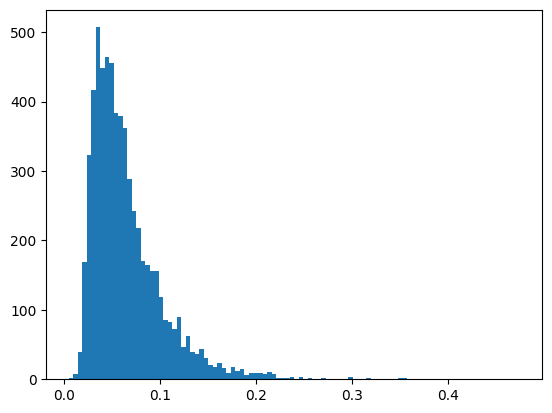

In [19]:
from matplotlib import pyplot as plt

plt.hist(all_magnitudes, bins=100)

In [22]:
(255*0.05)/1.5

8.5

In [32]:
# read video
video, audio, info = read_video("/home/abigata/PhD/code/generative-models/outputs/simple_video_sample/svd/000000.mp4", output_format="TCHW")
interval = int(info["video_fps"] / 2)  # For 25 fps, this will be 12 or 13
video = torch.nn.functional.interpolate(video, size=(64,64))

prev_video = video[:-1]
video = video[1:]
magnitude = []
for frame_count, (img_prev, img) in enumerate(zip(prev_video, video)):  # iterate over batch

    if frame_count % interval == 0:
        # convert to grayscale
        img_prev = cv2.cvtColor(img_prev.numpy().transpose(1, 2, 0), cv2.COLOR_RGB2GRAY)
        img = cv2.cvtColor(img.numpy().transpose(1, 2, 0), cv2.COLOR_RGB2GRAY)
        # estimate optical flow
        flow = cv2.calcOpticalFlowFarneback(img_prev, img, None, 0.5, 3, 15, 3, 5, 1.2, 0)
        magn, _ = cv2.cartToPolar(flow[..., 0], flow[..., 1])
        magnitude.append(magn)
magnitude = np.mean(magnitude)

/home/abigata/miniconda3/envs/svd/lib/python3.9/site-packages/torchvision/io/video.py:161: UserWarning: The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.
  warnings.warn("The pts_unit 'pts' gives wrong results. Please use pts_unit 'sec'.")


In [33]:
magnitude

0.4148349

: 